In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import numpy as np
import pandas as pd
dataset=pd.read_csv('/content/drive/MyDrive/ML-Training/Real estate valuation data set.csv')

In [42]:
dataset.isnull().sum()

No                                     0
transaction date                       0
house age                              0
distance to the nearest MRT station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
dtype: int64



1.   Collection of data
2.   data pre processing
    1.   handling nullvalues
    2.   label encoding
    1.   splitting dependent and independent variable
    2.   splitting into test and train set
    1.   weights in kgs, heihts in cms, age in years
    1.   above different features with different meausre units are scaled using feature scaling

1.   model building
    1.   import all the librarries
    2.   knn classifier
    1.   knn on our training data
2.   test the model on testing data
1.   accuracy of model


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#below is used to load dataset in jupyter 
#dataset=pd.read_csv(r"D:\SmartBridge\daasets\Social_Network_Ads.csv")

In [44]:
dataset.head()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


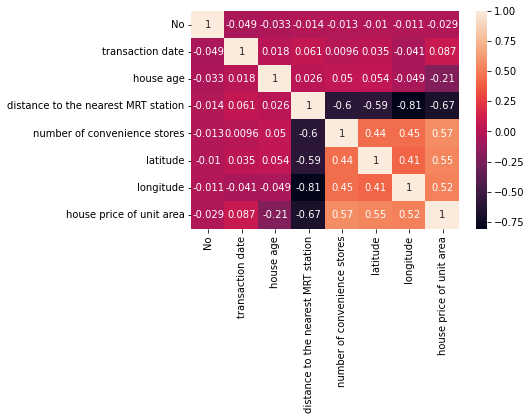

In [45]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True)

In [68]:
#slpitting dependant and indpendent variables
dataset.head()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [69]:
x=dataset.iloc[:,1:7].values
y=dataset.iloc[:,7:8].values

In [70]:
x.shape

(414, 6)

In [71]:
x

array([[2012.917  ,   32.     ,   84.87882,   10.     ,   24.98298,
         121.54024],
       [2012.917  ,   19.5    ,  306.5947 ,    9.     ,   24.98034,
         121.53951],
       [2013.583  ,   13.3    ,  561.9845 ,    5.     ,   24.98746,
         121.54391],
       ...,
       [2013.25   ,   18.8    ,  390.9696 ,    7.     ,   24.97923,
         121.53986],
       [2013.     ,    8.1    ,  104.8101 ,    5.     ,   24.96674,
         121.54067],
       [2013.5    ,    6.5    ,   90.45606,    9.     ,   24.97433,
         121.5431 ]])

In [72]:
y.shape

(414, 1)

In [73]:
y

array([[ 37.9],
       [ 42.2],
       [ 47.3],
       [ 54.8],
       [ 43.1],
       [ 32.1],
       [ 40.3],
       [ 46.7],
       [ 18.8],
       [ 22.1],
       [ 41.4],
       [ 58.1],
       [ 39.3],
       [ 23.8],
       [ 34.3],
       [ 50.5],
       [ 70.1],
       [ 37.4],
       [ 42.3],
       [ 47.7],
       [ 29.3],
       [ 51.6],
       [ 24.6],
       [ 47.9],
       [ 38.8],
       [ 27. ],
       [ 56.2],
       [ 33.6],
       [ 47. ],
       [ 57.1],
       [ 22.1],
       [ 25. ],
       [ 34.2],
       [ 49.3],
       [ 55.1],
       [ 27.3],
       [ 22.9],
       [ 25.3],
       [ 47.7],
       [ 46.2],
       [ 15.9],
       [ 18.2],
       [ 34.7],
       [ 34.1],
       [ 53.9],
       [ 38.3],
       [ 42. ],
       [ 61.5],
       [ 13.4],
       [ 13.2],
       [ 44.2],
       [ 20.7],
       [ 27. ],
       [ 38.9],
       [ 51.7],
       [ 13.7],
       [ 41.9],
       [ 53.5],
       [ 22.6],
       [ 42.4],
       [ 21.3],
       [ 63.2],
       [

In [74]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x)
x_train

array([[-0.82368321,  1.25562833, -0.79249504,  2.00740743,  1.12542986,
         0.44876222],
       [-0.82368321,  0.15708622, -0.61661163,  1.66750286,  0.91244418,
         0.40113894],
       [ 1.54115111, -0.38779067, -0.41401527,  0.30788458,  1.48686011,
         0.68818339],
       ...,
       [ 0.35873395,  0.09556786, -0.54967846,  0.98769372,  0.82289338,
         0.42397202],
       [-0.52896662, -0.84478419, -0.77668389,  0.30788458, -0.18475479,
         0.4768143 ],
       [ 1.24643452, -0.98539758, -0.78807071,  1.66750286,  0.42757905,
         0.63534112]])

In [75]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [76]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(331, 6)
(331, 1)
(83, 6)
(83, 1)


In [56]:
#Model building start
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [57]:
y_pred=svr.predict(x_test)

In [58]:
y_pred

array([43.73437202, 20.54149281, 42.78365882, 20.53953991, 44.04994708,
       41.28088875, 44.03128678, 42.06771232, 43.18732005, 42.21280459,
       43.42057579, 42.70037264, 43.91839207, 44.13038181, 43.35166573,
       40.01346531, 41.23684882, 43.94074848, 41.26265109, 43.88556019,
       44.62590459, 32.08436155, 35.77084445, 43.099005  , 41.65980511,
       42.28021334, 41.64710238, 28.52875076, 42.21954878, 21.80933859,
       42.90571664, 37.68876032, 43.23536092, 40.39049882, 41.64740164,
       32.08425943, 44.39142877, 30.12109926, 42.31862773, 23.82383954,
       42.6824571 , 40.65654936, 30.70992969, 44.47518492, 20.59279891,
       42.34901392, 40.88698318, 20.60001275, 26.97164622, 44.85411352,
       44.62548894, 39.94237342, 42.95104243, 33.06513215, 32.08441274,
       40.51333096, 42.28112349, 41.34554832, 43.42080314, 37.6889932 ,
       40.01246031, 44.37221899, 41.76924478, 43.18765497, 43.90987375,
       25.26035928, 20.53743772, 31.28270817, 42.2814962 , 41.28

In [59]:
y_test

array([[45.3],
       [14.4],
       [46. ],
       [15.6],
       [50.2],
       [38.1],
       [48.5],
       [41.4],
       [51.6],
       [40.1],
       [42. ],
       [42.4],
       [28.5],
       [39.1],
       [53.7],
       [36.8],
       [40.6],
       [55.2],
       [39.3],
       [44.3],
       [53.5],
       [25.3],
       [22.8],
       [51.7],
       [45.5],
       [34.4],
       [31.6],
       [25.9],
       [49.5],
       [24.7],
       [51.7],
       [29.7],
       [45.4],
       [50.5],
       [26.5],
       [30.1],
       [46.1],
       [28.9],
       [54.4],
       [15. ],
       [44.9],
       [29.8],
       [23.6],
       [48. ],
       [16.7],
       [40.9],
       [40.2],
       [12.9],
       [21.3],
       [62.1],
       [63.9],
       [40.3],
       [42.2],
       [19.1],
       [28.4],
       [28.5],
       [60.7],
       [37.5],
       [39.3],
       [28.8],
       [42.3],
       [44.3],
       [42.6],
       [57.4],
       [42.2],
       [25.7],
       [13

In [61]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)

In [63]:
accuracy

0.5724941870557224

In [78]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [79]:
y_pred=knn.predict(x_test)

In [80]:
y_pred[0:10]

array([[51.02],
       [18.2 ],
       [45.68],
       [18.2 ],
       [33.9 ],
       [37.32],
       [40.66],
       [33.48],
       [45.08],
       [30.54]])

In [81]:
y_test[0:10]

array([[45.3],
       [14.4],
       [46. ],
       [15.6],
       [50.2],
       [38.1],
       [48.5],
       [41.4],
       [51.6],
       [40.1]])

In [82]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)

In [83]:
accuracy

0.5888182445027108